In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import os

In [2]:
project_id = "anan-project"
n_qubits = 7

# os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/bq.json"

In [3]:
from core.utils.job_result import get_result_from_bq, summary_job_result
jobs = get_result_from_bq(project_id, "job_results", "vqe", f"n_qubits = {n_qubits}")

In [4]:
summaries = summary_job_result(jobs)
print(summaries)

[{'n_qubits': 7, 'gate_type': 'indirect_heisenberg', 'depth': 12, 't_type': 'random', 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'true', 'bounds': 'false', 't_evol': 'absolute', 'cost': {'min': -6.536261163369316, 'max': -5.231841179098959, 'mean': -5.698347347759589, 'std': 0.40022833096896554}, 'iter': {'min': 2463.0, 'max': 11666.0, 'mean': 6358.1, 'std': 2709.466237102799}}, {'n_qubits': 7, 'gate_type': 'indirect_xy', 'depth': 12, 't_type': 'random', 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 't_evol': 'absolute', 'cost': {'min': -7.774106007335385, 'max': -6.126963317776331, 'mean': -7.105122200032513, 'std': 0.550723966475825}, 'iter': {'min': 13179.0, 'max': 37784.0, 'mean': 23811.7, 'std': 8827.250954289222}}, {'n_qubits': 7, 'gate_type': 'indirect_xy', 'depth': 12, 't_type': 'random', 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'true',

In [5]:
## x axis: layer, y axis: expectation value
plot_list = {}
for summary in summaries:
    if summary['t_type'] == 'random':
        if ("%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])) not in plot_list.keys():
            plot_list["%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['depth']]
            plot_list["%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['mean']]
            plot_list["%s-%s-%s-%s-%s-%s-cost-std" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['std']]
            plot_list["%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['max']]
            plot_list["%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['mean']]
        else:
            plot_list["%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['depth'])
            plot_list["%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['mean'])
            plot_list["%s-%s-%s-%s-%s-%s-cost-std" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['std'])
            plot_list["%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['max'])
            plot_list["%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['mean'])

print(plot_list)

{'indirect_heisenberg-None-None-true-false-absolute-depth': [12, 16, 20, 24, 28, 32, 36, 40], 'indirect_heisenberg-None-None-true-false-absolute-cost-min': [-6.536261163369316, -7.21013108158137, -7.829787547803425, -7.866999207436656, -8.152162071473974, -8.310764074929896, -8.235750900907279, -8.399767686383592], 'indirect_heisenberg-None-None-true-false-absolute-cost-mean': [-5.698347347759589, -6.456750554291672, -7.28283430456429, -7.578432755995171, -7.760724789162232, -8.050857765198879, -8.113261693067713, -8.280428947161367], 'indirect_heisenberg-None-None-true-false-absolute-cost-std': [0.40022833096896554, 0.44695533109616237, 0.33560401187510985, 0.2150292672649249, 0.21681291099902517, 0.15116489318657078, 0.15902582279028005, 0.0784901534292498], 'indirect_heisenberg-None-None-true-false-absolute-iter-min': [2463.0, 4081.0, 10717.0, 9681.0, 19949.0, 27437.0, 36869.0, 54400.0], 'indirect_heisenberg-None-None-true-false-absolute-iter-max': [11666.0, 12329.0, 26638.0, 26730.

In [6]:
def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = (3.5, 3.5)
    plt.rcParams['font.family']= 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    if title is not None:
        plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

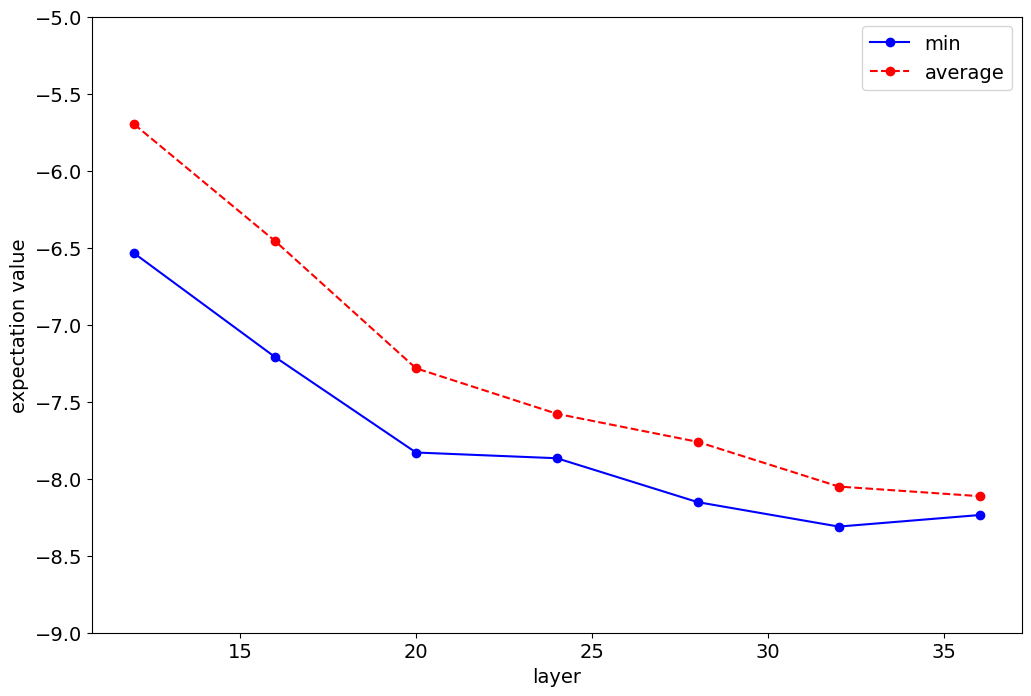

In [7]:
create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_heisenberg-None-None-true-false-absolute-depth'], plot_list['indirect_heisenberg-None-None-true-false-absolute-cost-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_heisenberg-None-None-true-false-absolute-depth'], plot_list['indirect_heisenberg-None-None-true-false-absolute-cost-mean'], marker='o', color='red', linestyle="dashed", label='average')
plt.legend()
# plt.savefig('./images/indirect_heisenberg_unbounds_expectation.png')